# Feature Transformation

# ML da feature transformation bu - modelga beriladigan ustunlarni yaxshiroq taqsimotga keltirish, shkalalash va model samaradorligini oshirish jarayonidir

# Skewness- bu feature taqsimotini chap va o`ng tamonga og`ib ketganligini bildiradi. 

# Skewness - bu taqsimotning simmetrik emasligini o`lchaydi 

- Skewness = 0 bo`lsa BU normal taqsimot 
- Skewness > 0  bo`lsa BU o`ngga qiyshiq taqsimot positiv skewness 
- Skewness < 0 bo`lsa BU chapga qiyshiq negativ skewness deyiladi 

# Positive Skewnessni oldini olsih uchun - Log tranformatsiya ishlatiladi
# Negative Skewnessni oldini olsih uchun - SQRT transformation ishlatiladi

# Agarda manfiy bo`lsa barcha qiymatlarga c=constant qiymat qo`shiladi

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

df = sns.load_dataset("titanic")

num_cols = ["age", "fare", "sibsp", "parch"]

skewness = df[num_cols].skew()
print(skewness)

age      0.389108
fare     4.787317
sibsp    3.695352
parch    2.749117
dtype: float64


# nega skewness qilish muhim - chunki ayrim algortimlar skewnesga kuchli sezgir agarda skedwnes to`girlanmasa algaritm xato ishlaydi
- Liner Regression
- Logistic Regression
-  KNN 
-  SVM 
- Tree based modellar (Decision Tree, Random Forest, SGBoost) ham kamroq sezgir

# Feature Transformation turlari

# Log Transformation - Katta skewnesslar uchun 

In [2]:
import numpy as np 

df["fare_log"] = np.log1p(df["fare"])

# log1p - bu log(1 + x ) no`l qiymatlar uchun havfsiz

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  fare_log     891 non-null    float64 
dtypes: bool(2), category(2), float64(3), int64(4), object(5)
memory usage: 87.6+ KB


In [4]:
num_cols = ["fare_log"]
skewness = df[num_cols].skew()
print(skewness)

fare_log    0.394928
dtype: float64


# Square Root Transformation - bu yengil skewnesslar uchun

In [5]:
df["fare_sqrt"] = np.sqrt(df["fare"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  fare_log     891 non-null    float64 
 16  fare_sqrt    891 non-null    float64 
dtypes: bool(2), category(2), float64(4), int64(4), object(5)
memory usage: 94

In [ ]:
num_cols = ["fare_sqrt"]
skewness = df[num_cols].skew()
print(skewness)

fare_sqrt    2.085004
dtype: float64


# Box- Cox Transformation - faqatgina musbat skewnesslar uchun

In [ ]:
from scipy.stats import boxcox

fare_bc, lambda_ = boxcox(df["fare"].dropna())

ValueError: Data must be positive.

# agarda biz bergan ustun ichida manfiy yoki 0 qiymatlar bo`lsa xatolik beradi

# Yeo-Johnson Transformation - manfiy va no`l qiymatlar bilan ishlaydi

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method="yeo-johnson")
df[["fare_yj"]] = pt.fit_transform(df[["fare"]])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  fare_log     891 non-null    float64 
 16  fare_sqrt    891 non-null    float64 
 17  fare_yj      891 non-null    float64 
dtypes: bool(2), category(2), float

In [13]:
num_cols = ["fare_yj"]
skewness = df[num_cols].skew()
print(skewness)

fare_yj   -0.040329
dtype: float64


# Vizual Taqqoslash

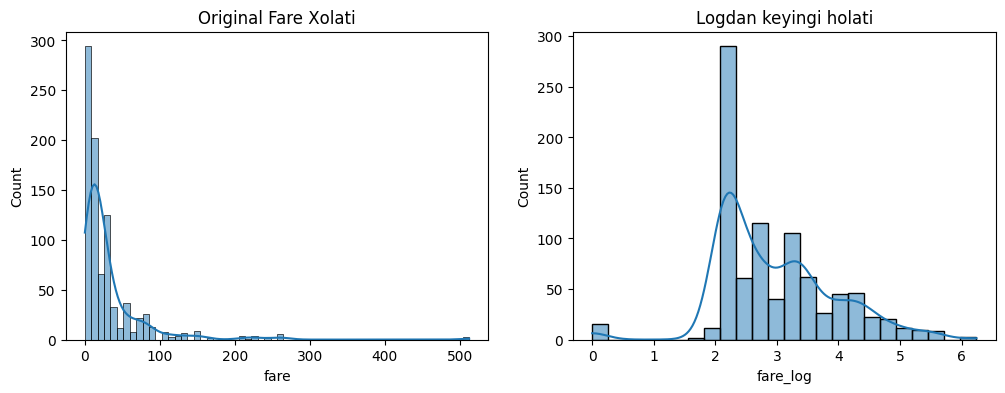

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df["fare"], kde=True, ax = axes[0])
axes[0].set_title("Original Fare Xolati")

sns.histplot(df["fare_log"], kde=True, ax=axes[1])
axes[1].set_title("Logdan keyingi holati")

plt.show()

# Transformation va scalingni biri biridan farqi shuki transformationda har bir ustun bo`yicha qiymatlarni taqsimotini normalga yaqinlashitradi scaling esa umumiy barecha featuirelarni bitta chegarali miqdorga keltiradi /// birinchi transform ishlatiladi so`ng scaling qilinadi 